In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = "/content/gdrive/MyDrive/Hackathon_EFI/Clean Data/Sample 2007-2017/Merged Melted Carbon Emission.xlsx"
df_carbone_emission = pd.read_excel(path)

path = "/content/gdrive/MyDrive/Hackathon_EFI/Clean Data/Sample 2007-2017/Distance to default.xlsx"
df_distance_to_default = pd.read_excel(path)

path = "/content/gdrive/MyDrive/Hackathon_EFI/Clean Data/Sample 2007-2017/Melted Market Cap.xlsx"
df_market_cap = pd.read_excel(path)

path = "/content/gdrive/MyDrive/Hackathon_EFI/Clean Data/Sample 2007-2017/Melted Operating Margin.xlsx"
df_operating_margin = pd.read_excel(path)

path = "/content/gdrive/MyDrive/Hackathon_EFI/Clean Data/Sample 2007-2017/Melted Total Assets.xlsx"
df_total_assets = pd.read_excel(path)

path = "/content/gdrive/MyDrive/Hackathon_EFI/Clean Data/Sample 2007-2017/Working Capital.xlsx"
df_working_capital = pd.read_excel(path)
df_working_capital = pd.melt(df_working_capital, id_vars="Date")
df_working_capital.rename(columns={"variable":"Ticker"}, inplace=True)

path = "/content/gdrive/MyDrive/Hackathon_EFI/Clean Data/Sample 2007-2017/Retained Earnings.xlsx"
df_retained_earnings = pd.read_excel(path)
df_retained_earnings = pd.melt(df_retained_earnings, id_vars="Date")
df_retained_earnings.rename(columns={"variable":"Ticker"}, inplace=True)

path = "/content/gdrive/MyDrive/Hackathon_EFI/Clean Data/Sample 2007-2017/Debt Ratio.xlsx"
df_debt_ratio = pd.read_excel(path)
df_debt_ratio = pd.melt(df_debt_ratio, id_vars="Date")
df_debt_ratio.rename(columns={"variable":"Ticker"}, inplace=True)

path = "/content/gdrive/MyDrive/Hackathon_EFI/Clean Data/Sample 2007-2017/Volatility.xlsx"
df_volatility = pd.read_excel(path)
df_volatility = pd.melt(df_volatility, id_vars="Date")
df_volatility.rename(columns={"variable":"Ticker"}, inplace=True)

path = "/content/gdrive/MyDrive/Hackathon_EFI/Clean Data/Sample 2007-2017/Price Energy.xlsx"
df_price_energy = pd.read_excel(path)
df_price_energy.rename(columns={"PX_LAST":"Date",}, inplace=True)

path = "/content/gdrive/MyDrive/Hackathon_EFI/Clean Data/Sample 2007-2017/Merged Carbon Intensity.xlsx"
df_carbone_intensity = pd.read_excel(path)
df_carbone_intensity = pd.melt(df_carbone_intensity, id_vars="Date")
df_carbone_intensity.rename(columns={"variable":"Ticker"}, inplace=True)

In [ ]:
path = "/content/gdrive/MyDrive/Hackathon_EFI/Clean Data/Sample 2007-2017/Distance to default.xlsx"
df_distance_to_default = pd.read_excel(path)

In [ ]:
numerical_columns = df_distance_to_default.select_dtypes(exclude="datetime64")

In [ ]:
df_distance_to_default = df_distance_to_default.melt(id_vars="Date", value_vars=numerical_columns,)

In [ ]:
df_distance_to_default.rename(
    columns={"variable":"Ticker"}, 
    inplace=True
    )
df_distance_to_default.set_index(["Date", "Ticker"], inplace=True)

In [ ]:
for df in [
    df_carbone_emission, 
    df_market_cap, 
    df_operating_margin, 
    df_total_assets,
    df_working_capital,
    df_retained_earnings,
    df_debt_ratio,
    df_volatility, 
    df_carbone_intensity
    ] : 
    try : 
      df.set_index(["Date", "Ticker"], inplace=True)
    except :
      None

try :
  df = df_carbone_emission.rename(columns={"value":"carbone emission"})
  df["distance to default"] = df_distance_to_default["value"]
  df["market cap"] = df_market_cap["value"]
  df["operating margin"] = df_operating_margin["value"]
  df["total assets"] = df_total_assets["value"]
  df["working capital"] = df_working_capital["value"]
  df["retained earnings"] = df_retained_earnings["value"]
  df["debt ratio"] = df_debt_ratio["value"]
  df["volatility"] = df_volatility["value"]
  df["carbone intensity"] = df_carbone_intensity["value"]
except :
  print("error")

df.reset_index(inplace=True)
df.sort_values("Date", inplace=True)

In [ ]:
df = df.set_index("Date").join(df_price_energy.set_index("Date")).reset_index()

In [ ]:
filtre = (df["Date"] > pd.to_datetime("2011-12-31")) & (df["Date"] < pd.to_datetime("2020-12-31")) 

df_truncature = df[filtre].set_index("Ticker")

filtre = (df_truncature.T.isna().sum().groupby("Ticker").sum() == 0)
filtre = [index for index in filtre.index if filtre[index] == True]

df_truncature.reset_index(inplace=True)

filtre = df_truncature.Ticker.isin(filtre)

df_truncature = df_truncature[filtre]

In [ ]:
format = '%Y'
df_truncature["Date"] = pd.to_datetime(df_truncature["Date"], format=format)

In [ ]:
df_truncature.set_index(["Ticker", "Date"], inplace=True)

In [ ]:
df_truncature["log carbone emission"] = df_truncature["carbone emission"].apply(lambda x : np.log(1+x))

In [ ]:
df_truncature["log carbone intensity"] = df_truncature["carbone intensity"].apply(lambda x : np.log(1+x))

In [ ]:
df_truncature["log total assets"] = df_truncature["total assets"].apply(lambda x : np.log(1+x))

In [ ]:
df_truncature["retained earnings ratio"] = df_truncature["retained earnings"] / df_truncature["total assets"] 

In [ ]:
df_truncature["working capital ratio"] = df_truncature["working capital"] / df_truncature["total assets"]

In [ ]:
df_truncature.reset_index(inplace=True)
event = pd.to_datetime("2015-01-01")
event_end = pd.to_datetime("2016-01-01")

df_truncature["event"] = 0
df_truncature.loc[(df_truncature.Date >= event), "event"] = 1

df_truncature["log carbone emission ante"] = df_truncature["log carbone emission"]
df_truncature["log carbone emission post"] = df_truncature["log carbone emission"]
df_truncature.loc[df_truncature.Date >= event, "log carbone emission ante"] = 0
df_truncature.loc[df_truncature.Date < event, "log carbone emission post"] = 0

df_truncature["log carbone intensity ante"] = df_truncature["log carbone intensity"]
df_truncature["log carbone intensity post"] = df_truncature["log carbone intensity"]
df_truncature.loc[df_truncature.Date >= event, "log carbone intensity ante"] = 0
df_truncature.loc[df_truncature.Date < event, "log carbone intensity post"] = 0

df_truncature["carbone intensity ante"] = df_truncature["carbone intensity"]
df_truncature["carbone intensity post"] = df_truncature["carbone intensity"]
df_truncature.loc[df_truncature.Date >= event, "carbone intensity ante"] = 0
df_truncature.loc[df_truncature.Date < event, "carbone intensity post"] = 0

df_truncature.Date = pd.to_datetime(df_truncature["Date"])
df_truncature.set_index(["Ticker", "Date"], inplace=True)

In [ ]:
cols = ["EQY TICKER", "Country", "Industry"]
sample = pd.read_excel("/content/gdrive/MyDrive/Hackathon_EFI/Data/Sample 2007-2017/Final Sample.xlsx")
sample = sample[cols]

sample.rename(columns={"EQY TICKER":"Ticker"}, inplace=True)
df_truncature = df_truncature.reset_index().set_index("Ticker").join(sample.set_index("Ticker"))

In [ ]:
df_truncature.reset_index(inplace=True)

In [ ]:
import statsmodels.api as sm
from linearmodels.panel import PooledOLS
from linearmodels import PanelOLS
from sklearn.preprocessing import StandardScaler

In [ ]:
def model(
    data_all=df_truncature, 
    control_variables=[
        "log total assets", 
        "operating margin", 
        "working capital ratio", 
        "retained earnings ratio",
        "debt ratio",
        "volatility",
        "Oil",
        ],
    target_variable="distance to default", 
    interets_variable=["log carbone emission"], 
    year_min=pd.to_datetime("2011-12-01"),
    year_max=pd.to_datetime("2020-12-01"),
    scaler=True, 
    cst=True, 
    cov="robust",
    entity=False, 
    ) : 
    """Function that runs a PanelOLS model
    
    Inputs :
      -df
      -control_variable
      -target_variable
      -interets_variable
      -year_min
      -year_max
    Output : 
      -print of the model 
    """

    data = data_all[(data_all.Date >= year_min) & (data_all.Date <= year_max)].copy()
    data = data.set_index(["Ticker", "Date"])
    exog = data[control_variables + interets_variable]

    if scaler == True : 
        autoscaler = StandardScaler()
        scaled_exog = autoscaler.fit_transform(exog)
        exog = pd.DataFrame(scaled_exog, index=exog.index, columns=exog.columns)
    
    if cst == True : 
      exog = sm.tools.tools.add_constant(exog)

    endog = data[target_variable]

    model_fe = PanelOLS(endog, exog, entity_effects = entity) 
    fe_res = model_fe.fit(cov_type=cov)

    print(fe_res)

In [ ]:
for var in [
    ["log carbone emission"], 
    ["carbone intensity"], 
    ["carbone intensity", "carbone intensity post", "event"],
    ] : 
    print(var)
    model(interets_variable=var)

['log carbone emission']


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                           PanelOLS Estimation Summary                           
Dep. Variable:     distance to default   R-squared:                        0.5793
Estimator:                    PanelOLS   R-squared (Between):              0.5792
No. Observations:                 2547   R-squared (Within):               0.5538
Date:                 Sat, Oct 15 2022   R-squared (Overall):              0.5793
Time:                         04:13:54   Log-likelihood                   -6212.0
Cov. Estimator:                 Robust                                           
                                         F-statistic:                      436.86
Entities:                          269   P-value                           0.0000
Avg Obs:                        9.4684   Distribution:                  F(8,2538)
Min Obs:                        9.0000                                           
Max Obs:                        27.000   F-statistic (robust):             259.66
                

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                           PanelOLS Estimation Summary                           
Dep. Variable:     distance to default   R-squared:                        0.5832
Estimator:                    PanelOLS   R-squared (Between):              0.5832
No. Observations:                 2547   R-squared (Within):               0.5578
Date:                 Sat, Oct 15 2022   R-squared (Overall):              0.5832
Time:                         04:13:55   Log-likelihood                   -6200.2
Cov. Estimator:                 Robust                                           
                                         F-statistic:                      354.80
Entities:                          269   P-value                           0.0000
Avg Obs:                        9.4684   Distribution:                 F(10,2536)
Min Obs:                        9.0000                                           
Max Obs:                        27.000   F-statistic (robust):             236.71
                

In [ ]:
for var in [
    ["log carbone emission"], 
    ["carbone intensity"], 
    ["carbone intensity", "carbone intensity post", "event"],
    ] : 
    print(var)
    model(interets_variable=var, entity=True, cst=False)

['log carbone emission']
                           PanelOLS Estimation Summary                           
Dep. Variable:     distance to default   R-squared:                        0.5782
Estimator:                    PanelOLS   R-squared (Between):              0.0450
No. Observations:                 2547   R-squared (Within):               0.5782
Date:                 Sat, Oct 15 2022   R-squared (Overall):              0.0782
Time:                         04:16:31   Log-likelihood                   -5092.9
Cov. Estimator:                 Robust                                           
                                         F-statistic:                      388.91
Entities:                          269   P-value                           0.0000
Avg Obs:                        9.4684   Distribution:                  F(8,2270)
Min Obs:                        9.0000                                           
Max Obs:                        27.000   F-statistic (robust):           

In [ ]:
for var in [
    ["log carbone emission"], 
    ["carbone intensity"], 
    ["carbone intensity", "carbone intensity post", "event"],
    ] : 
    print(var)
    model(
        data_all=df_truncature[df_truncature.Industry=="Energy"], 
        interets_variable=var,
        )

['log carbone emission']
                           PanelOLS Estimation Summary                           
Dep. Variable:     distance to default   R-squared:                        0.6871
Estimator:                    PanelOLS   R-squared (Between):              0.6366
No. Observations:                  243   R-squared (Within):               0.7141
Date:                 Sat, Oct 15 2022   R-squared (Overall):              0.6871
Time:                         05:15:35   Log-likelihood                   -525.49
Cov. Estimator:                 Robust                                           
                                         F-statistic:                      64.231
Entities:                           24   P-value                           0.0000
Avg Obs:                        10.125   Distribution:                   F(8,234)
Min Obs:                        9.0000                                           
Max Obs:                        18.000   F-statistic (robust):           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                           PanelOLS Estimation Summary                           
Dep. Variable:     distance to default   R-squared:                        0.6971
Estimator:                    PanelOLS   R-squared (Between):              0.6551
No. Observations:                  243   R-squared (Within):               0.7200
Date:                 Sat, Oct 15 2022   R-squared (Overall):              0.6971
Time:                         05:15:35   Log-likelihood                   -521.56
Cov. Estimator:                 Robust                                           
                                         F-statistic:                      53.383
Entities:                           24   P-value                           0.0000
Avg Obs:                        10.125   Distribution:                  F(10,232)
Min Obs:                        9.0000                                           
Max Obs:                        18.000   F-statistic (robust):             28.574
                

In [ ]:
df_graph = df_truncature[["Industry", "carbone emission"]].groupby("Industry").mean().reset_index()

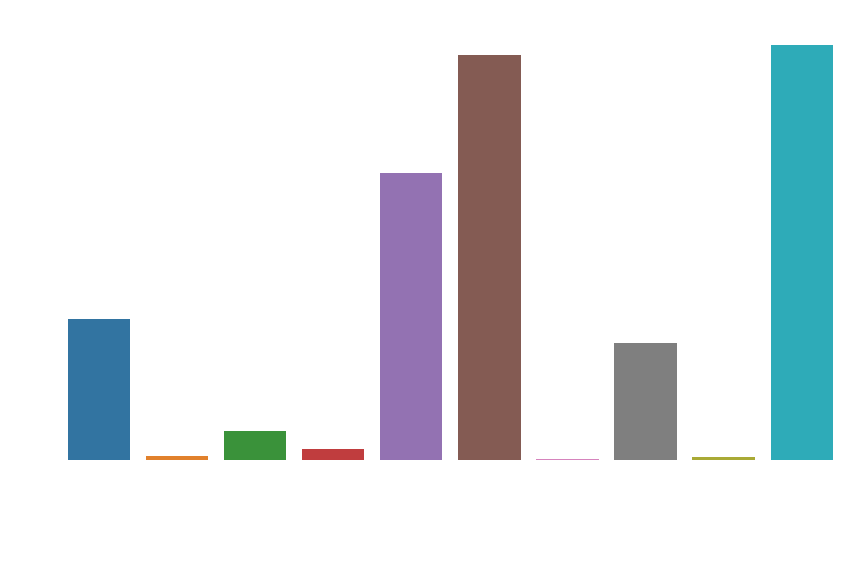

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

ax.tick_params(axis='x', rotation=45, colors="white")
ax.tick_params(axis='y', colors="white")
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
ax.set_ylabel("Emission carbone", color="white")
ax.set_xlabel("Industrie", color="white")
ax.set_title(
    "Emission carbone par secteur d'industrie", 
    fontsize=16, fontweight="bold", color="white"
    )

sns.barplot(data=df_graph, x="Industry", y="carbone emission", ax=ax)


In [ ]:
df_truncature.to_csv("/content/gdrive/MyDrive/Hackathon_EFI/Clean Data/data_model.csv")

In [ ]:
path

'/content/gdrive/MyDrive/Hackathon_EFI/Clean Data/Sample 2007-2017/Distance to default.xlsx'

In [ ]:
for var in [
    ["log carbone emission"], 
    ["carbone intensity"], 
    ["carbone intensity", "carbone intensity post", "event"],
    ] : 
    print(var)
    model(
        data_all=df_truncature[df_truncature.Industry=="Energy"], 
        interets_variable=var,
        control_variables=[
          "log total assets", 
          "operating margin", 
          "working capital ratio", 
          "retained earnings ratio",
          "debt ratio",
          "volatility",
          "Oil",
          "Natural Gas"],
        cst=True, 
        cov="robust",
        entity=False, 
    )

['log carbone emission']


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                           PanelOLS Estimation Summary                           
Dep. Variable:     distance to default   R-squared:                        0.7056
Estimator:                    PanelOLS   R-squared (Between):              0.6221
No. Observations:                  243   R-squared (Within):               0.7474
Date:                 Sat, Oct 15 2022   R-squared (Overall):              0.7056
Time:                         06:15:39   Log-likelihood                   -518.08
Cov. Estimator:                 Robust                                           
                                         F-statistic:                      62.052
Entities:                           24   P-value                           0.0000
Avg Obs:                        10.125   Distribution:                   F(9,233)
Min Obs:                        9.0000                                           
Max Obs:                        18.000   F-statistic (robust):             42.970
                

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                           PanelOLS Estimation Summary                           
Dep. Variable:     distance to default   R-squared:                        0.7082
Estimator:                    PanelOLS   R-squared (Between):              0.6311
No. Observations:                  243   R-squared (Within):               0.7467
Date:                 Sat, Oct 15 2022   R-squared (Overall):              0.7082
Time:                         06:15:39   Log-likelihood                   -517.03
Cov. Estimator:                 Robust                                           
                                         F-statistic:                      62.819
Entities:                           24   P-value                           0.0000
Avg Obs:                        10.125   Distribution:                   F(9,233)
Min Obs:                        9.0000                                           
Max Obs:                        18.000   F-statistic (robust):             41.829
                

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
df_truncature.loc[df_truncature.Industry=="Energy",["Date", "carbone emission"]].groupby("Date").mean()

,carbone emission
Date,
2012-03-31,26864.934444
2013-03-31,25300.073000
2014-03-31,24952.257815
2015-03-31,24361.519963
2016-03-31,23691.015963
2017-03-31,23659.756667
2018-03-31,24140.153704
2019-03-31,24356.788852
2020-03-31,24601.306630
